In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Advertising.csv')
df = pd.DataFrame(df)
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

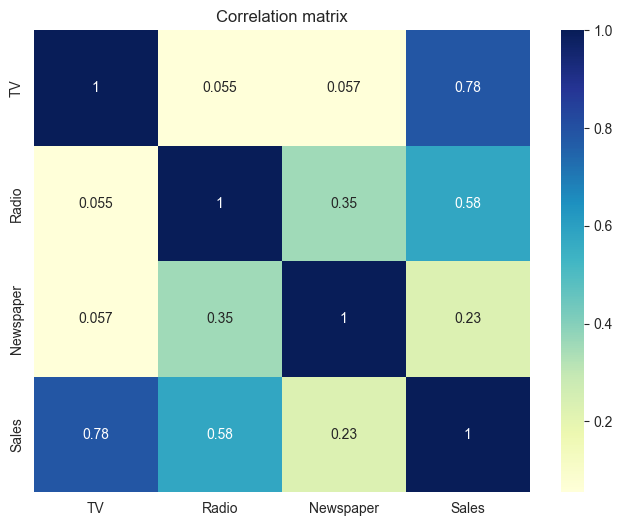

In [6]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation matrix')
plt.show()

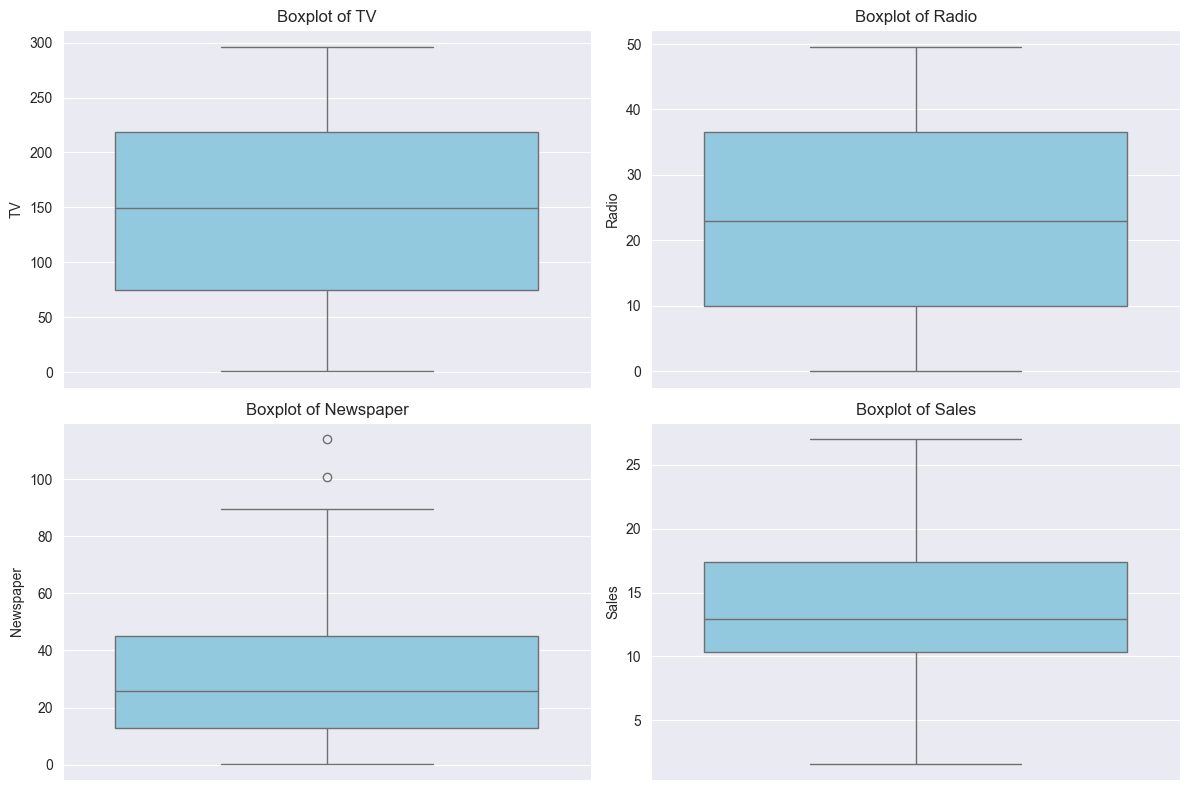

In [7]:
features = ['TV', 'Radio', 'Newspaper', 'Sales']

plt.figure(figsize=(12, 8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [8]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

for col in ['Newspaper']:
    df = remove_outliers_iqr(df, col)

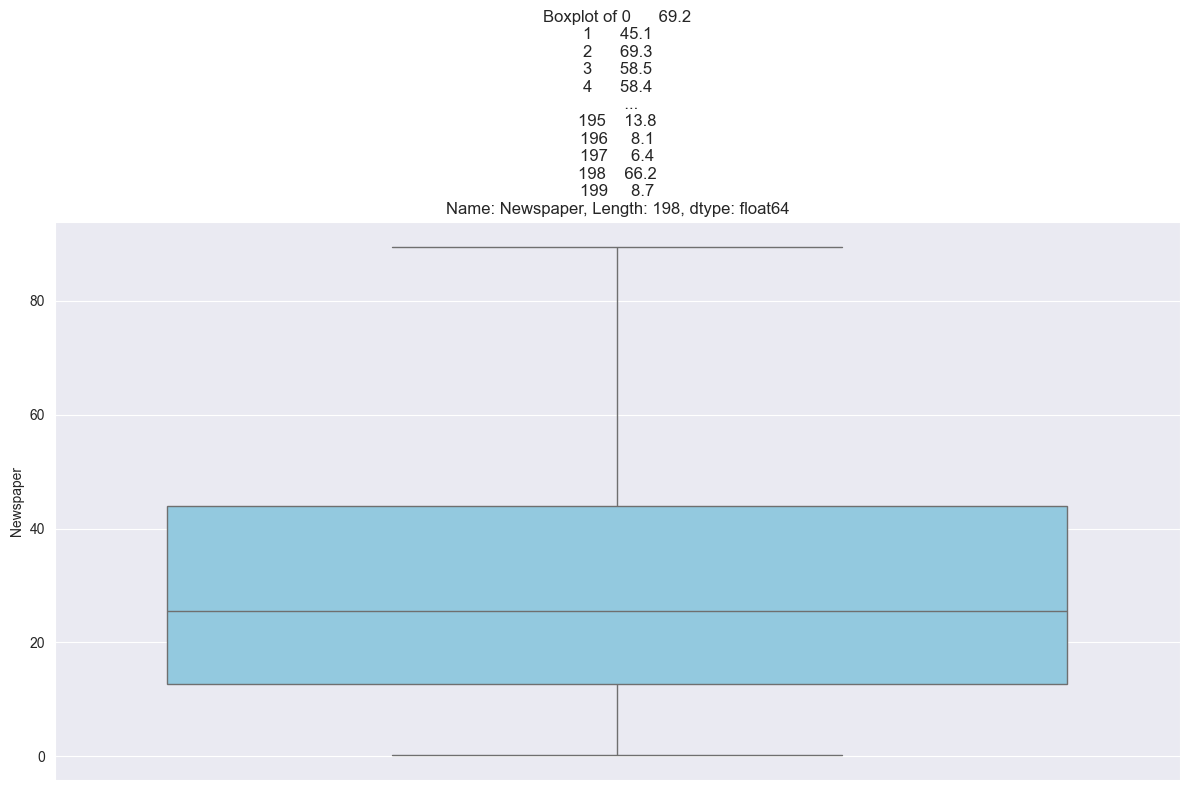

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(y=df[col], color='skyblue')
plt.title(f"Boxplot of {df['Newspaper']}")
plt.tight_layout()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n🔸 {name}")
    print("R² Score:", round(r2_score(y_test, y_pred), 4))
    print("MAE     :", round(mean_absolute_error(y_test, y_pred), 4))
    print("RMSE    :", round(np.sqrt(mean_squared_error(y_test, y_pred)), 4))



🔸 Linear Regression
R² Score: 0.8989
MAE     : 1.2497
RMSE    : 1.6556

🔸 Ridge Regression
R² Score: 0.8989
MAE     : 1.2498
RMSE    : 1.6556

🔸 Decision Tree
R² Score: 0.9716
MAE     : 0.725
RMSE    : 0.8784

🔸 Random Forest
R² Score: 0.9847
MAE     : 0.5449
RMSE    : 0.644


C:\Python 3.11\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


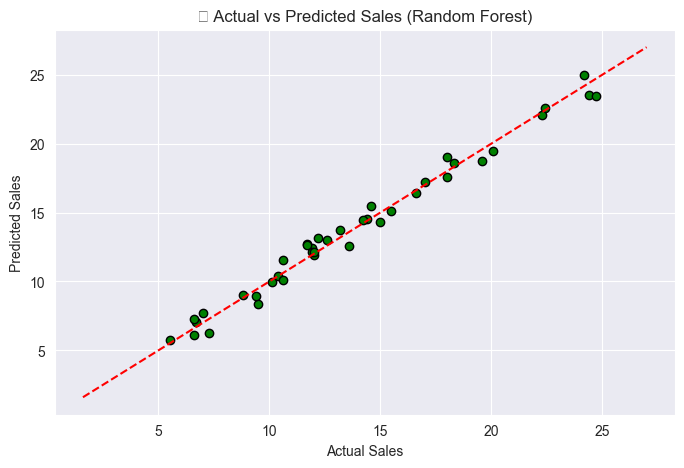

In [15]:

y_pred_rf = models["Random Forest"].predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, color='green', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("📈 Actual vs Predicted Sales (Random Forest)")
plt.grid(True)
plt.show()


In [16]:
import pickle

with open("sales_model_rf.pkl", "wb") as f:
    pickle.dump(models["Random Forest"], f)

print("✅ Model saved as sales_model_rf.pkl")


✅ Model saved as sales_model_rf.pkl
